# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.dataloader import *
from utils.model import *

In [60]:
def roc(target, input):
    # globally
    TP = []
    FP = []
    
    scale = input.sort_values().unique()

    for tt in scale:
        all_estim = 1* (input > tt)
        true_positive = np.mean(all_estim[target == 1])
        true_negative = 1-np.mean(all_estim[target == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

def bce(target, input):
    n = len(target)
    input = input/1.00001
    y = target * np.log(input) + (1-target) * np.log(1 - input)
    return - 1/n * sum(y)


def fscore(target, input, threshold):
    estim = 1*(input > threshold)
    TP = np.mean(estim[target == 1])
    FP = np.mean(estim[target == 0])
    return 2*TP/(1 + TP + FP)


# Figure 1

In [61]:
LB_5s = pd.read_csv('./results/LB_5s.csv')
LB_15s = pd.read_csv('./results/LB_15s.csv')
LB_30s = pd.read_csv('./results/LB_30s.csv')

SV_5s = pd.read_csv('./results/SV_5s.csv')
SV_15s = pd.read_csv('./results/SV_15s.csv')
SV_30s = pd.read_csv('./results/SV_30s.csv')

In [62]:
species = ['SV', 'LB']
method = ['fpt', 'hmm', 'FCNet', 'CNNet', 'UNet']
resolution = [5, 15, 30]

combination = np.meshgrid(resolution, species, method)
table = pd.DataFrame({'resolution':combination[0].flatten(), 'species':combination[1].flatten(), 'method':combination[2].flatten()})

/home/amdroy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


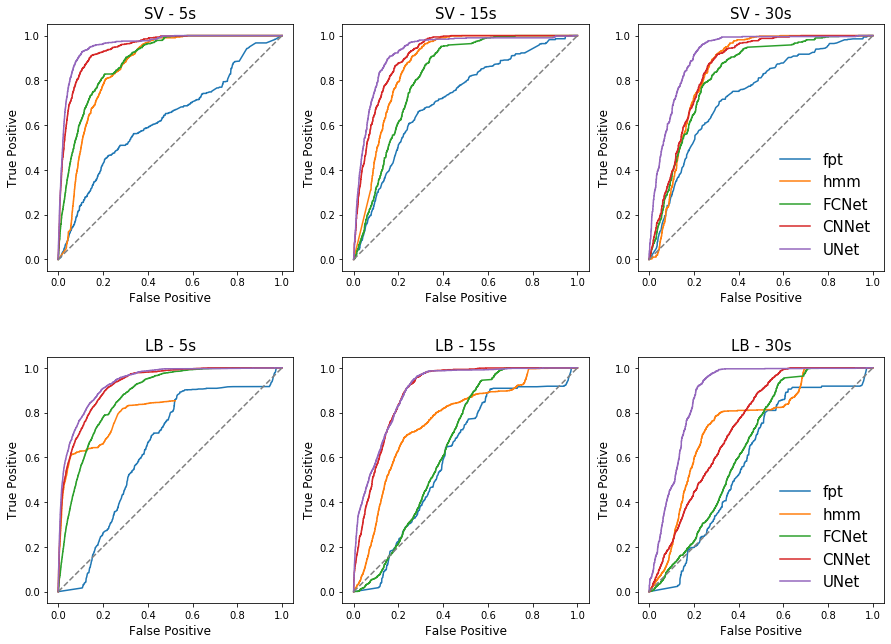

In [63]:
fig, ax = plt.subplots(2,3, figsize=(15,11))
plt.subplots_adjust(hspace=0.25)

AUC = []
BCE = []
FSCORE = []

data = SV_5s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[0,0].plot(fp, tp, label = m)
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,0].set_title('SV - 5s',fontsize= 15)

data = SV_15s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[0,1].plot(fp, tp, label = m)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,1].set_title('SV - 15s',fontsize= 15)

data = SV_30s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[0,2].plot(fp, tp, label = m)
ax[0,2].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,2].set_title('SV - 30s',fontsize= 15)
ax[0,2].legend(fontsize = 15, frameon=False)

data = LB_5s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[1,0].plot(fp, tp, label = m)
ax[1,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,0].set_title('LB - 5s',fontsize= 15)

data = LB_15s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[1,1].plot(fp, tp, label = m)
ax[1,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,1].set_title('LB - 15s',fontsize= 15)

data = LB_30s
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[1,2].plot(fp, tp, label = m)
ax[1,2].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,2].set_title('LB - 30s',fontsize= 15)
ax[1,2].legend(fontsize = 15, frameon=False)

for a in ax.flat:
    a.set_xlabel('False Positive', fontsize= 12)
    a.set_ylabel('True Positive', fontsize= 12)
    a.set_aspect('equal')

In [64]:
table['AUC'] = AUC
table['BCE'] = BCE
table['FSCORE'] = FSCORE

table

,resolution,species,method,AUC,BCE,FSCORE
0,5,SV,fpt,0.623473,0.707774,0.551066
1,5,SV,hmm,0.858464,1.070738,0.699759
2,5,SV,FCNet,0.886799,0.382893,0.813380
3,5,SV,CNNet,0.942614,0.296450,0.876182
4,5,SV,UNet,0.958339,0.233392,0.911157
5,15,SV,fpt,0.714140,0.786142,0.663578
6,15,SV,hmm,0.872122,2.389260,0.842952
7,15,SV,FCNet,0.818408,0.809238,0.800546
8,15,SV,CNNet,0.912100,0.577855,0.853111
9,15,SV,UNet,0.926874,0.565542,0.861613


In [46]:
# fp, tp = roc(LB_5s.dive, LB_5s.hmm+1e-20)
# -np.trapz(tp, fp)
# TP = np.concatenate([np.array([max(tp)]), tp])
# FP = np.concatenate([np.array([1]), fp])

# plt.plot(FP, TP)
# -np.trapz(TP, FP)

# bce(LB_5s.dive, LB_5s.hmm + 1e-20)
# fscore(LB_5s.dive, LB_5s.hmm, 0.5)

0.24698169882157084

# Figure 2

In [65]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [66]:
def grid_bathy(bathy_file):
    data = Dataset(bathy_file)
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
    lon, lat = np.meshgrid(lon, lat)
    bathy = data.variables['elevation'][:]
    return lon, lat, bathy

def my_map(lon, lat, prediction, dive, bathy_file, vmin, vmax, area = None, axis = True):
    
    if area is None:
        long_min, long_max = np.min(lon) - 0.1, np.max(lon) + 0.1
        lat_min, lat_max = np.min(lat)  - 0.1, np.max(lat) + 0.1
        
    else :
        long_min = area[0]
        long_max = area[1]
        lat_min  = area[2]
        lat_max  = area[3]

    # create map using BASEMAP
    m = Basemap(llcrnrlon=long_min,
                llcrnrlat=lat_min,
                urcrnrlon=long_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(long_max-long_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )
                
    m.drawcoastlines()
    m.drawmapboundary(fill_color='#CEECF5')
    m.fillcontinents(color = '#A4A4A4',lake_color='#CEECF5')

    if axis :
        # labels = [left,right,top,bottom]
        parallels = np.arange(-90,90,0.25)
        m.drawparallels(parallels, labels = [True, False, False, False])
        meridians = np.arange(-90,90,0.25)
        m.drawmeridians(meridians, labels = [False, False, False, True])

    #bathy
    xx, yy, bathy = grid_bathy(bathy_file)
    m.pcolormesh(xx, yy, bathy, latlon = True, cmap='Greys_r', vmin = vmin, vmax=vmax)
#     m.pcolormesh(xx, yy, bathy, latlon = True, cmap='Blues_r', vmin = -500, vmax=100)

    x, y = m(lon.values, lat.values)
    m.scatter(x, y, marker = 'o', s = 0.5, alpha= 0.1, color = 'black', zorder = 1)

    m.scatter(x, y, marker = 'o', s = prediction*100, alpha = 0.5,  color='tab:blue', zorder = 2)

    dx, dy = m(lon.values[(dive == 1)], lat.values[(dive == 1)])
    m.scatter(dx, dy, marker = 'o', s = 20, alpha = 1,  color='tab:red', zorder = 3)

    # dx, dy = m(lon.values[(dive == 1) & (prediction>0.5)], lat.values[(dive == 1) & (prediction>0.5)])
    # m.scatter(dx, dy, marker = 'o', s = 50, alpha= 0.5, color = 'tab:blue', label = 'True Positive', zorder = 3)

    return m
    

In [67]:
LB = pd.read_csv('./results/LB_5s.csv')
SV = pd.read_csv('./results/SV_5s.csv')
SV_gnp = pd.read_csv('./results/transfer_guanape_from_SV.csv')
SD = pd.read_csv('./results/fine_tuning_SD_15s.csv')

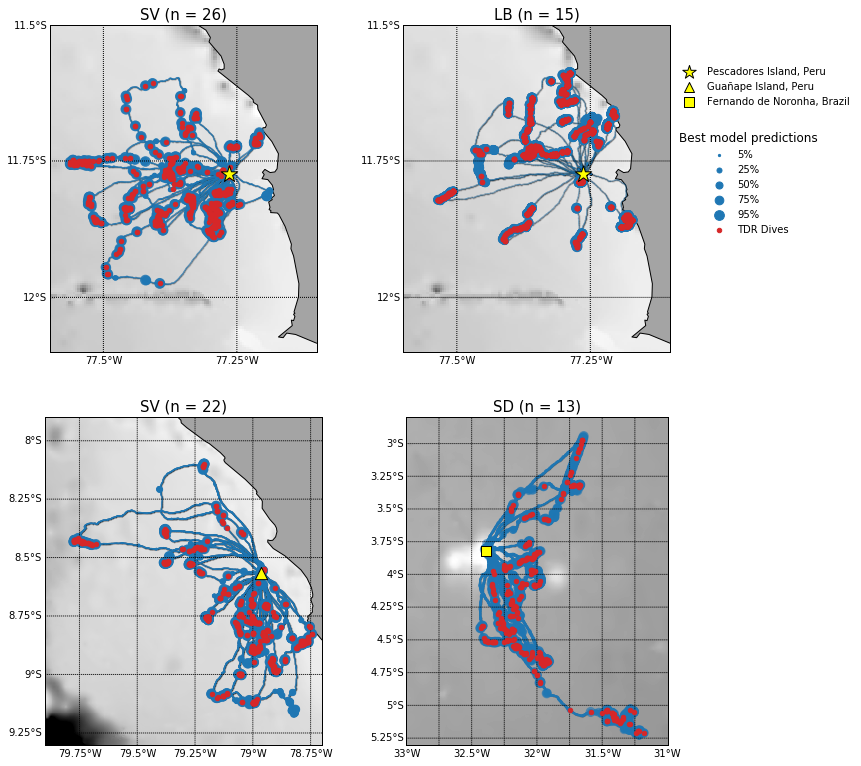

In [81]:
plt.figure(figsize = (9, 10))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.2) 

plt.subplot(2,2, 1)
m = my_map(SV.lon, SV.lat, SV.UNet, SV.dive, '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc', vmin = -700, vmax=100, area = [-77.6, -77.1, -12.1, -11.5])
x, y = m(-77.264, -11.773)
plt.scatter(x, y, marker = '*', color = 'yellow', edgecolors = 'black', s = 300, zorder = 5)
plt.title('SV (n = '+ str(len(SV.trip.unique()))  + ')',fontsize= 15)

plt.subplot(2,2, 2)
m = my_map(LB.lon, LB.lat, LB.UNet, LB.dive,
           '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc', vmin = -700, vmax=100, area = [-77.6, -77.1, -12.1, -11.5])
x, y = m(-77.264, -11.773)
plt.scatter(x, y, marker = '*', color = 'yellow', edgecolors = 'black', s = 300, zorder = 5)
plt.title('LB (n = '+ str(len(LB.trip.unique()))  + ')',fontsize= 15)

p1 = plt.scatter(0, 0, marker = 'o', color = 'tab:blue', s = 5, zorder = 0) 
p2 = plt.scatter(0, 0, marker = 'o', color = 'tab:blue', s = 25, zorder = 0)
p3 = plt.scatter(0, 0, marker = 'o', color = 'tab:blue', s = 50, zorder = 0) 
p4 = plt.scatter(0, 0, marker = 'o', color = 'tab:blue', s = 75, zorder = 0)
p5 = plt.scatter(0, 0, marker = 'o', color = 'tab:blue', s = 95, zorder = 0)
p6 = plt.scatter(0, 0, marker = 'o', color = 'tab:red', s = 20, zorder = 0)
legend_dive = plt.legend([p1, p2, p3, p4, p5, p6], ['5%', '25%', '50%', '75%', '95%', 'TDR Dives'], title="Best model predictions", title_fontsize = 12, bbox_to_anchor=(1, 0.7), frameon = False)

c1 = plt.scatter(-1, -1, marker = '*', color = 'yellow', edgecolors = 'black', s = 200, zorder = 0) 
c2 = plt.scatter(-1, -1, marker = '^', color = 'yellow', edgecolors = 'black', s = 100, zorder = 0) 
c3 = plt.scatter(-1, -1, marker = 's', color = 'yellow', edgecolors = 'black', s = 100, zorder = 0) 
plt.legend([c1, c2, c3], ['Pescadores Island, Peru', 'Guañape Island, Peru', 'Fernando de Noronha, Brazil'], bbox_to_anchor=(1, 0.9), frameon = False)
plt.gca().add_artist(legend_dive)

plt.subplot(2,2,3)
m = my_map(SV_gnp.lon, SV_gnp.lat, SV_gnp.UNet, SV_gnp.dive, '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_guanape.nc', vmin = -700, vmax=100, area = [-79.9, -78.7, -9.3, -7.9])
x, y = m(-78.966,-8.566)
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.title('SV (n = '+ str(len(SV_gnp.trip.unique()))  + ')',fontsize= 15)

plt.subplot(2,2, 4)
m = my_map(SD.lon, SD.lat, SD.CNNet, SD.dive, '/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_fernando.nc', vmin = -10000, vmax=100, area = [-33, -31, -5.3, -2.8], axis = False)
# labels = [left,right,top,bottom]
meridians = np.arange(-90,90,0.5)
m.drawmeridians(meridians, labels = [False, False, False, True])
meridians = np.arange(-90.25,90.25,0.5)
m.drawmeridians(meridians, labels = [False, False, False, False])
parallels = np.arange(-90,90,0.25)
m.drawparallels(parallels, labels = [True, False, False, False])

x, y = m(-32.392,-3.819)
plt.scatter(x, y, marker = 's', color = 'yellow', edgecolors = 'black', s = 100, zorder = 5)
plt.title('SD (n = '+ str(len(SD.trip.unique()))  + ')',fontsize= 15)

plt.show()


## Figure 3

In [69]:
import scipy.stats as st

In [70]:
def get_kde(lon, lat, weights=None):
    # Define the grid
    long_min, long_max = np.min(lon) - 0.1, np.max(lon) + 0.1
    lat_min, lat_max = np.min(lat)  - 0.1, np.max(lat) + 0.1
    xx, yy = np.mgrid[long_min:long_max:0.01, lat_min:lat_max:0.01]
    positions = np.vstack([xx.ravel(), yy.ravel()])

    # Peform the kernel density estimate
    values = np.vstack([lon, lat])
    kernel = st.gaussian_kde(values, weights = weights)
    kernel.set_bandwidth(bw_method=0.25)

    # Compute the grid
    f = np.reshape(kernel(positions).T, xx.shape)
    
    return (xx, yy, f/np.sum(f))

In [71]:
def my_kde_map(xx, yy, f, vmax=30, axis=True):
    # Define the grid
    long_min, long_max = np.min(xx), np.max(xx)
    lat_min, lat_max = np.min(yy), np.max(yy)
    
    # create map using BASEMAP
    m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
    m.drawcoastlines()
    m.drawmapboundary(fill_color='#CEECF5')
    m.fillcontinents(color = '#A4A4A4',lake_color='#CEECF5')


    parallels = np.arange(-15,-5,0.5)
    if axis==True:
        labels = [True,False,False,True]
    else:
        labels = [False,False,False,False]
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, labels = labels)
    meridians = np.arange(-80,-75,0.5)
    m.drawmeridians(meridians, labels = labels)

    #bathy
    m.pcolormesh(xx, yy, f, latlon = True, cmap='viridis', vmin = 0, vmax=vmax)

    return m


In [72]:
SV_from_SV = pd.read_csv('./results/transfer_guanape_from_SV.csv')
SD_from_SV = pd.read_csv('./results/transfer_SD_from_SV.csv')
SV_from_LB = pd.read_csv('./results/transfer_guanape_from_LB.csv')
SD_from_LB = pd.read_csv('./results/transfer_SD_from_LB.csv')

In [73]:
species = ['SV', 'SD']
method = ['fpt', 'hmm', 'FCNet', 'CNNet', 'UNet']
origin = ['from_SV', 'from_LB']

combination = np.meshgrid(species, origin, method)
table = pd.DataFrame({'origin':combination[2].flatten(),'species':combination[1].flatten(), 'method':combination[0].flatten()})

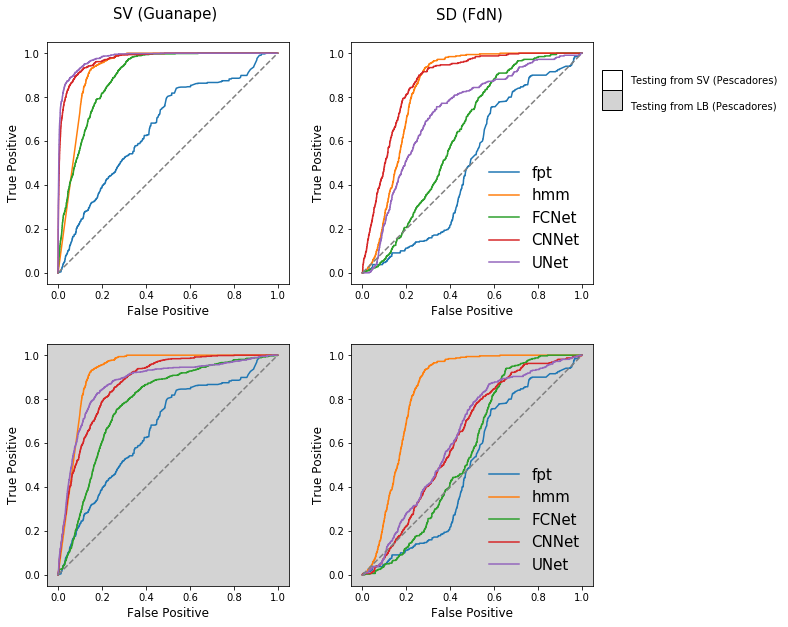

,origin,species,method,AUC,BCE,FSCORE
0,fpt,from_SV,SV,0.652524,0.565411,0.434650
1,hmm,from_SV,SV,0.924767,2.462870,0.876527
2,FCNet,from_SV,SV,0.892849,0.311421,0.803745
3,CNNet,from_SV,SV,0.970808,0.201667,0.908030
4,UNet,from_SV,SV,0.979127,0.103800,0.910257
5,fpt,from_SV,SD,0.496878,0.755408,0.226872
6,hmm,from_SV,SD,0.835578,1.863781,0.812109
7,FCNet,from_SV,SD,0.626781,1.174262,0.711921
8,CNNet,from_SV,SD,0.868965,0.589210,0.833435
9,UNet,from_SV,SD,0.727264,0.576138,0.551002


In [74]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.subplots_adjust(hspace=0.25)

AUC = []
BCE = []
FSCORE = []

for j in range(4):
    ax.flat[j].set_xlabel('False Positive', fontsize= 12)
    ax.flat[j].set_ylabel('True Positive', fontsize= 12)
    ax.flat[j].set_aspect('equal')
    if j in [2, 3]:
        ax.flat[j].set_facecolor('lightgrey')

# Creating legend with color box
import matplotlib.patches as mpatches
white_patch = mpatches.Patch(facecolor='white', label='Testing from SV (Pescadores)\n', edgecolor='black')
grey_patch = mpatches.Patch(facecolor='lightgrey', label='Testing from LB (Pescadores)', edgecolor='black')
legend_patch = ax[0,1].legend(handles=[white_patch, grey_patch], handlelength= 2, frameon = False, bbox_to_anchor=(1, 0.9))
for patch in legend_patch.get_patches():
    patch.set_height(20)

data = SV_from_SV
for m in method:
    fp, tp = roc(data.dive, data[m]) 
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[0,0].plot(fp, tp, label = m)
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,0].set_title('SV (Guanape) \n',fontsize= 15)

data = SD_from_SV
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[0,1].plot(fp, tp, label = m)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,1].set_title('SD (FdN) \n',fontsize= 15)
ax[0,1].legend(fontsize = 15, frameon=False)
ax[0,1].add_artist(legend_patch)

data = SV_from_LB
for m in method:
    fp, tp = roc(data.dive, data[m]) 
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[1,0].plot(fp, tp, label = m)
ax[1,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')

data = SD_from_LB
for m in method:
    fp, tp = roc(data.dive, data[m])
    AUC.append(-np.trapz(tp, fp))
    BCE.append(bce(data.dive, data[m]))
    FSCORE.append(fscore(data.dive, data[m], 0.5))
    ax[1,1].plot(fp, tp, label = m)
ax[1,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,1].legend(fontsize = 15, frameon=False)

plt.show()

table['AUC'] = AUC
table['BCE'] = BCE
table['FSCORE'] = FSCORE

table

In [75]:
(xx, yy, f_unet) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.UNet)
(xx, yy, f_cnnet) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.CNNet)
(xx, yy, f_fcn) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.FCNet)

(xx, yy, f_hmm) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.hmm)
(xx, yy, f_fpt) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.fpt)
(xx, yy, f_dive) = get_kde(SV_from_SV.lon, SV_from_SV.lat, SV_from_SV.dive)

Text(0.5, 1.0, 'FCNet')

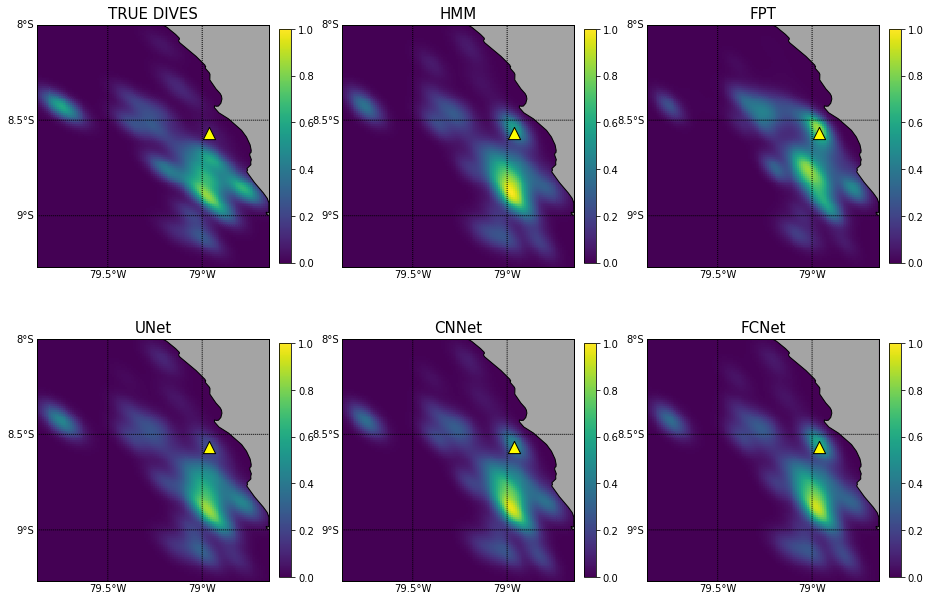

In [76]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.2) 

vmax = 1e-3
colony = (-78.966,-8.566)

# vmax = 4e-4
# colony = (-32.392,-3.819)

plt.subplot(2,3,1)
m = my_kde_map(xx, yy, f_dive, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('TRUE DIVES',fontsize= 15)

plt.subplot(2,3,2)
m = my_kde_map(xx, yy, f_hmm, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('HMM',fontsize= 15)

plt.subplot(2,3,3)
m = my_kde_map(xx, yy, f_fpt, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('FPT',fontsize= 15)

plt.subplot(2,3,4)
m = my_kde_map(xx, yy, f_unet, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('UNet',fontsize= 15)

plt.subplot(2,3,5)
m = my_kde_map(xx, yy, f_cnnet, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('CNNet',fontsize= 15)

plt.subplot(2,3,6)
m = my_kde_map(xx, yy, f_fcn, vmax, axis = True)
x, y = m(colony[0],colony[1])
plt.scatter(x, y, marker = '^', color = 'yellow', edgecolors = 'black', s = 150, zorder = 5)
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('FCNet',fontsize= 15)

[0.010993341420304717, 0.007668902002979851, 0.007704350828587348, 0.006544374991311988, 0.004079695472034183]


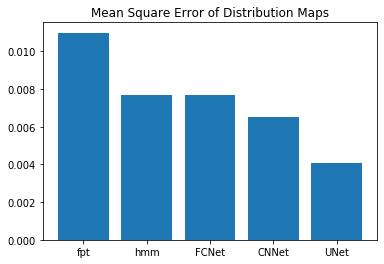

In [77]:
dist = [np.sqrt( np.sum( (f - f_dive)**2))  for f in [f_fpt, f_hmm, f_fcn, f_cnnet, f_unet]]
barlist=plt.bar(['fpt', 'hmm', 'FCNet', 'CNNet', 'UNet'], dist)
plt.title('Mean Square Error of Distribution Maps')
# table['dist'] = dist
print(dist)

# Fine-tuning


In [78]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

auc = pd.read_csv('./results/fine_tuning_auc.csv')
# auc = auc[auc.nb > 1]

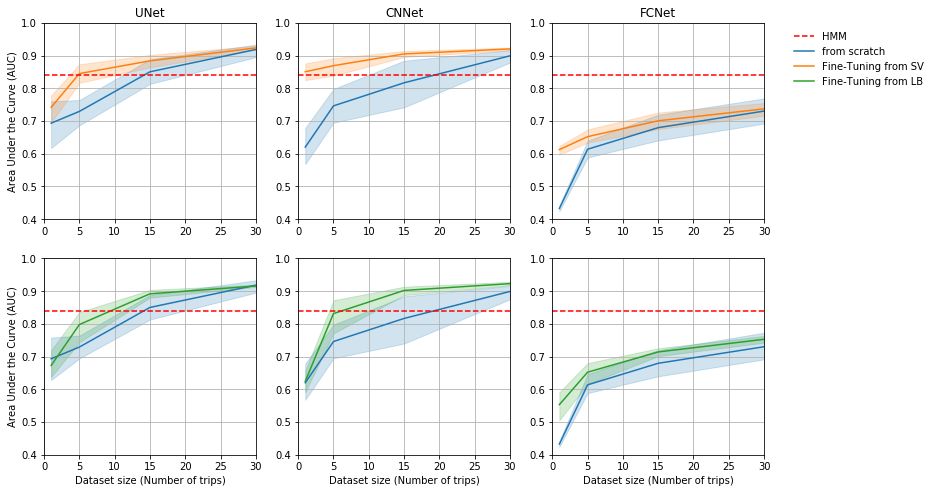

In [79]:
col = ['UNet', 'CNNet', 'FCNet']
row = ['LB', 'SV']

fig, ax = plt.subplots(len(row),len(col),figsize = (10,6))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.2) 

for i in range(len(row)):
    r = row[i]
    for j in range(len(col)):
        c = col[j]

        if i == 0:
            palette = ['tab:blue', 'tab:orange']
        else :
            palette = ['tab:blue', 'tab:green']
        
        sb.lineplot(x='nb', y='auc', hue = 'method', data = auc[(auc.model == c) & (auc.method != r)], ax = ax[i,j], legend = False, palette = palette)
        ax[i,j].axhline(y=0.84, linestyle='--', color = 'red', label = 'HMM')
        ax[i,j].grid()
        ax[i,j].set_xlim(0, 30)
        ax[i,j].set_ylim(0.4, 1)

        if i == 0 :
            ax[i,j].set_title(c)

        if i == 1 :
            ax[i,j].set_xlabel('Dataset size (Number of trips)')
        else : 
            ax[i,j].set_xlabel('')

        if j == 0 :
            ax[i,j].set_ylabel('Area Under the Curve (AUC)')
        else : 
            ax[i,j].set_ylabel('')

        if (i==0) & (j==2):
            ax[i,j].axhline(y=-1, linestyle='-', color = 'tab:blue', label = 'from scratch')
            ax[i,j].axhline(y=-1, linestyle='-', color = 'tab:orange', label = 'Fine-Tuning from SV')
            ax[i,j].axhline(y=-1, linestyle='-', color = 'tab:green', label = 'Fine-Tuning from LB')
            ax[i,j].legend(frameon=False, bbox_to_anchor=(1.1, 1))


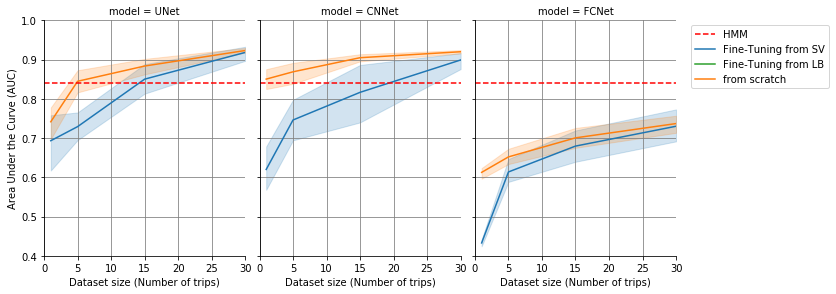

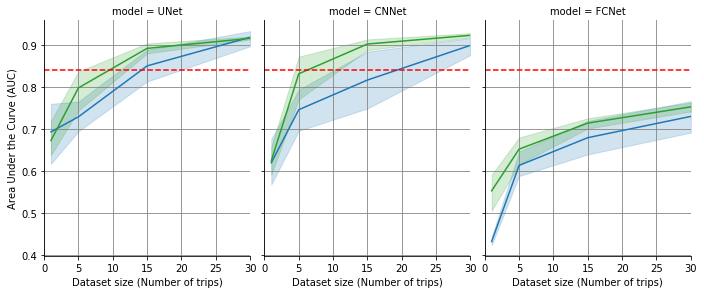

In [80]:
g = sb.relplot(x='nb', y='auc', hue = 'method', col="model", data = auc[auc.method != 'LB'],  height=4, aspect=0.8,  kind="line", legend = False) 
g.map(plt.axhline, y=0.84, linestyle='--', color = 'red', label = 'HMM')
g.map(plt.axhline, y=-1, linestyle='-', color = 'tab:blue', label = 'Fine-Tuning from SV')
g.map(plt.axhline, y=-1, linestyle='-', color = 'tab:green', label = 'Fine-Tuning from LB')
g.map(plt.axhline, y=-1, linestyle='-', color = 'tab:orange', label = 'from scratch')
g.map(plt.grid, color = 'grey')
g.set(xlabel='Dataset size (Number of trips)',ylabel='Area Under the Curve (AUC)', xlim = (0, 30), ylim = (0.4, 1))
plt.legend(bbox_to_anchor=(1.05, 1))


g = sb.relplot(x='nb', y='auc', hue = 'method', col="model", data = auc[auc.method != 'SV'],  height=4, aspect=0.8,  kind="line", legend = False, palette = ['tab:blue', 'tab:green']) 
g.map(plt.axhline, y=0.84, linestyle='--', color = 'red', label = 'HMM')
g.map(plt.grid, color = 'grey')
g.set(xlabel='Dataset size (Number of trips)',ylabel='Area Under the Curve (AUC)', xlim = (0, 30))